## Test MnistData class


This file perform testing on MNIST class by predicting the label of custom generated MNIST Samples.

In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pickle
import mnist_data

In [2]:
#initialize Mnist data
data = mnist_data.MnistData()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists. Loading...


In [3]:
def init_network():
    '''initialize network'''
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

In [4]:
net = init_network()

In [5]:
net

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [6]:
def sigmoid(x):
    '''sigmoid function'''
    return 1/(1 + np.exp(-x))

In [7]:
#Test sigmoid function
a = np.array([10, 20, 30])
s = sigmoid(a)
s

array([0.9999546, 1.       , 1.       ])

In [8]:
def softmax(a):
    '''softmax function'''
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)

In [9]:
#testing the softmax function
a = np.array([10, 20, 30])
s = softmax(a)
s

array([2.06106005e-09, 4.53978686e-05, 9.99954600e-01])

In [10]:
def predict(network, x):
    '''prediction with simple neural network'''
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

In [11]:
class Mnist():
    """ class for working with the MNIST dataset"""
    
    def __init__(self):
        """Initializes the Mnist class with data and empty parameters."""
        self.data = mnist_data.MnistData()
        self.params = {}

    def sigmoid(self, x):
        """Applies sigmoid activation functio"""
        return 1 / (1 + np.exp(-x))

    def softmax(self, a):
        """Applies softmax activation function"""
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a / np.sum(exp_a)

    def load(self):
        """Loads the MNIST training and test datasets"""
        (x_train, y_train), (x_test, y_test) = self.data.load()
        return (x_train, y_train), (x_test, y_test)
    
    def init_network(self):
        """Initializes network weights and biases from a pre-trained file."""
        with open('sample_weight.pkl', 'rb') as f:
            self.params = pickle.load(f)
    
    def predict(self, x):
        """function to predict class probabilities."""
        w1, w2, w3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.softmax(a3)

        return y    

## Testing with Custom MNIST Samples (One image from each set)

### Correct Prediction Examples

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mnist import Mnist

# Mnist model
mnist_model = Mnist()
mnist_model.init_network()
custom_images_root_dir = 'Custom MNIST Samples'

def load_image(path):
    """Preprocess the image to black background, white digit"""
    ### NOTE : since the image is already in 28 * 28 size and grayscale mode, there is no need of further processing
    img = Image.open(path)
    img = np.array(img, dtype=np.float32)
    img = 255 - img
    img = img - np.min(img)
    img = img * (255 / (np.max(img) - np.min(img)))
    img = img / 255.0
    img = img.flatten()
    return img

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists. Loading...


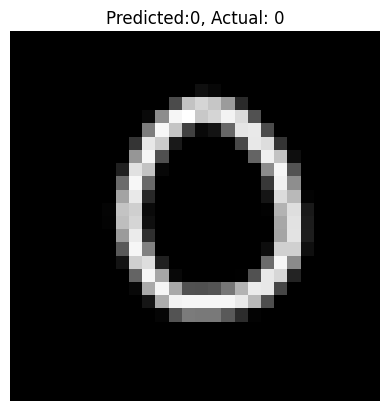



Success: The image is correctly classified.



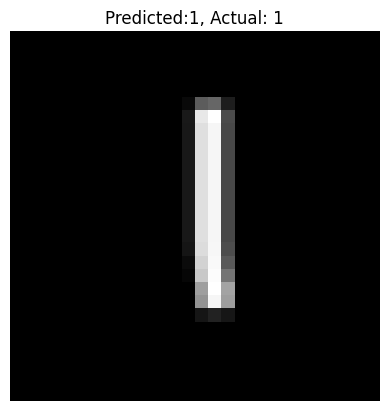



Success: The image is correctly classified.



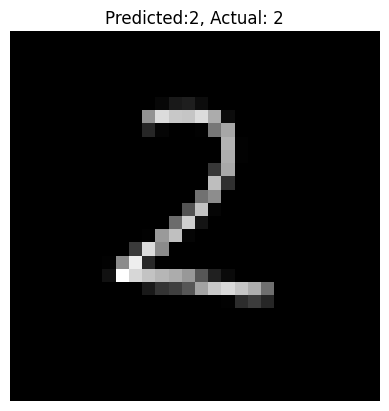



Success: The image is correctly classified.



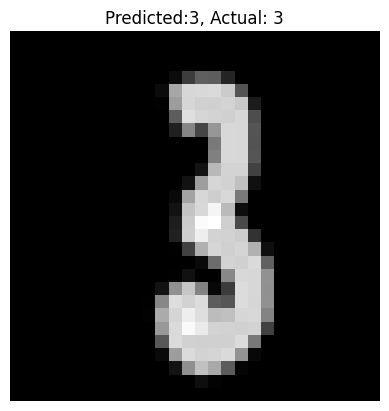



Success: The image is correctly classified.



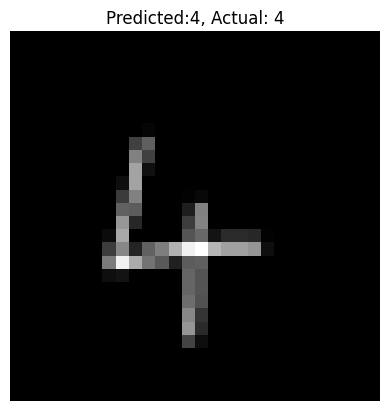



Success: The image is correctly classified.



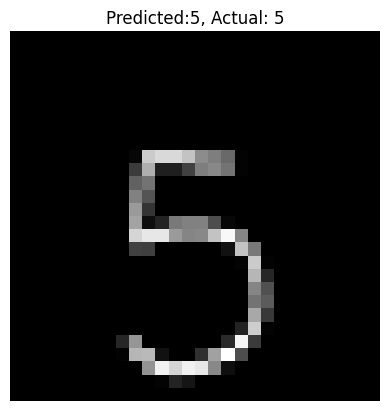



Success: The image is correctly classified.



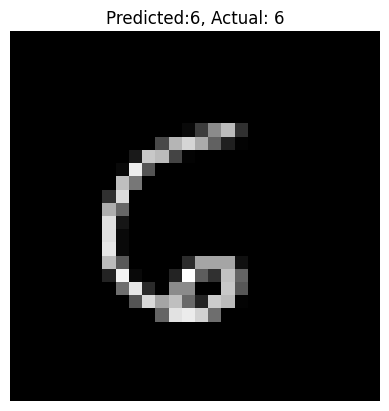



Success: The image is correctly classified.



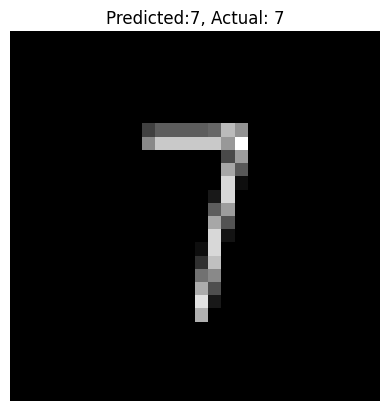



Success: The image is correctly classified.



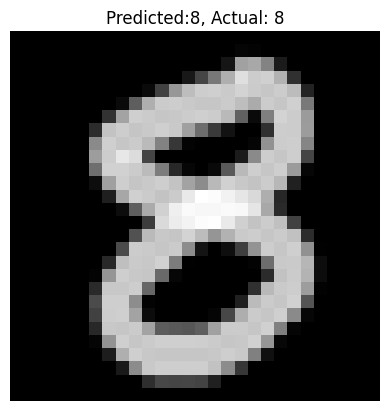



Success: The image is correctly classified.



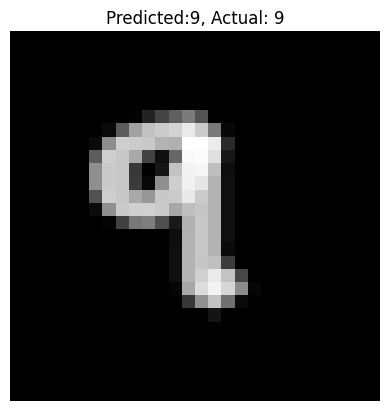



Success: The image is correctly classified.



In [13]:
# test one image from each digit subdirectory
for digit_dir in sorted(os.listdir(custom_images_root_dir)):
    digit_path = os.path.join(custom_images_root_dir, digit_dir)
    
    # extract the label from directory name
    if os.path.isdir(digit_path) and digit_dir:
        actual_label = int(digit_dir.split()[-1])
        
        # List and check for image files
        image_files = [f for f in os.listdir(digit_path) if f.endswith('.png') or f.endswith('.jpg')]
        
        if image_files:
            test_image = image_files[0]
            image_path = os.path.join(digit_path, test_image)

            # Load and preprocess the image
            img = load_image(image_path)
            
            # Make a prediction
            predicted_label = np.argmax(mnist_model.predict(img))

            # Display the image
            plt.imshow(img.reshape(28, 28), cmap="gray")
            plt.title(f"Predicted:{predicted_label}, Actual: {actual_label}")
            plt.axis("off")
            plt.show()
            
            if predicted_label == actual_label:
                print("\n\nSuccess: The image is correctly classified.\n")
            else:
                print(f"\n\nFail: Image {image_path} is for digit {actual_label} but the inference result is {predicted_label}\n")

            


### Incorrect Prediction Example

NOTE: Since all my images gives correct prediction, to demo an incorrect prediction, this section is made. Here predicted_label is changed to wrong_label decrementing by 1 to make a mismatch from actual_label

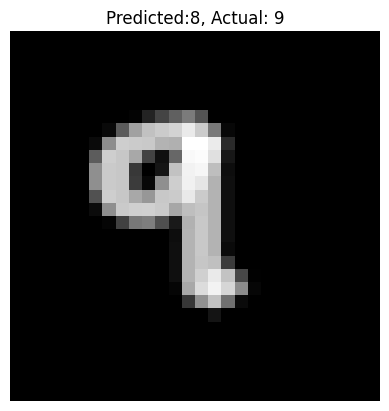



Fail: Image Custom MNIST Samples\Digit 9\9_0.png is for digit 9 but the inference result is 8



In [14]:
#take a sample image
test_image = image_files[0]
image_path = os.path.join(digit_path, test_image)

# Load and preprocess the image
img = load_image(image_path)

# Make a prediction
predicted_label = np.argmax(mnist_model.predict(img))

wrong_label = predicted_label-1 #NOTE : This operation is only made to create a fail case
# Display the image
plt.imshow(img.reshape(28, 28), cmap="gray")
plt.title(f"Predicted:{wrong_label}, Actual: {actual_label}")
plt.axis("off")
plt.show()


if wrong_label == actual_label:
    print("\n\nSuccess: The image is correctly classified.\n")
else:
    print(f"\n\nFail: Image {image_path} is for digit {actual_label} but the inference result is { wrong_label }\n")

## Predict with batch

This section perform prediction with a batch size of 5.This cell

- Displays all images with actual and predicted labels
- Prints predcted label and corresponding actual labels in different arrays

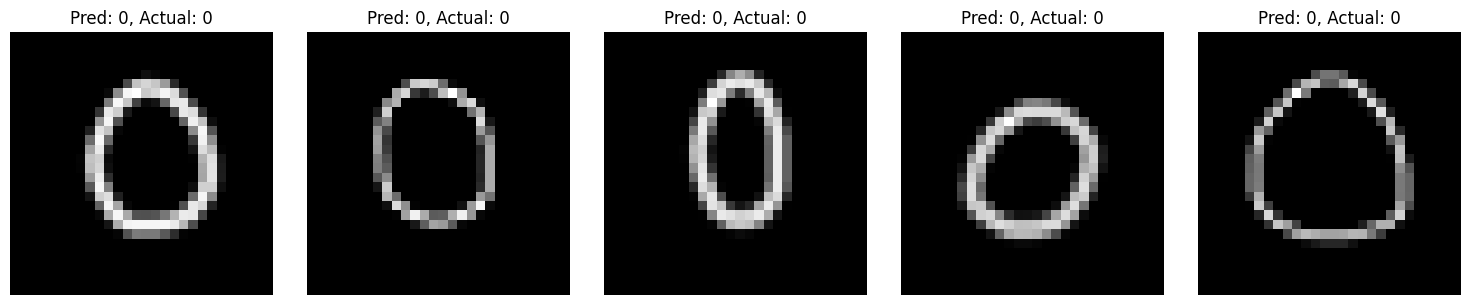

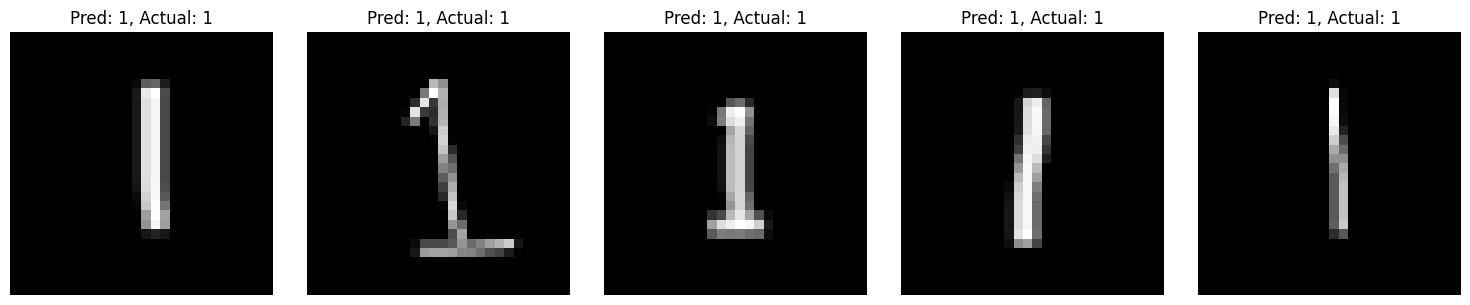

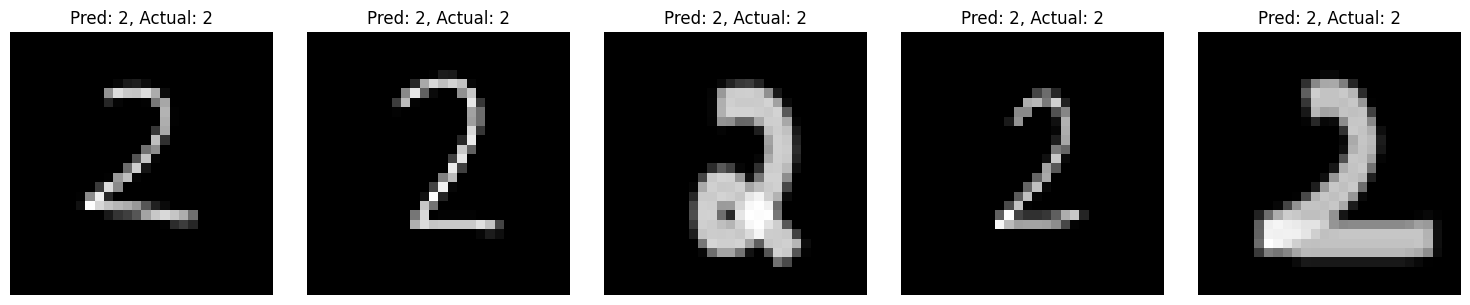

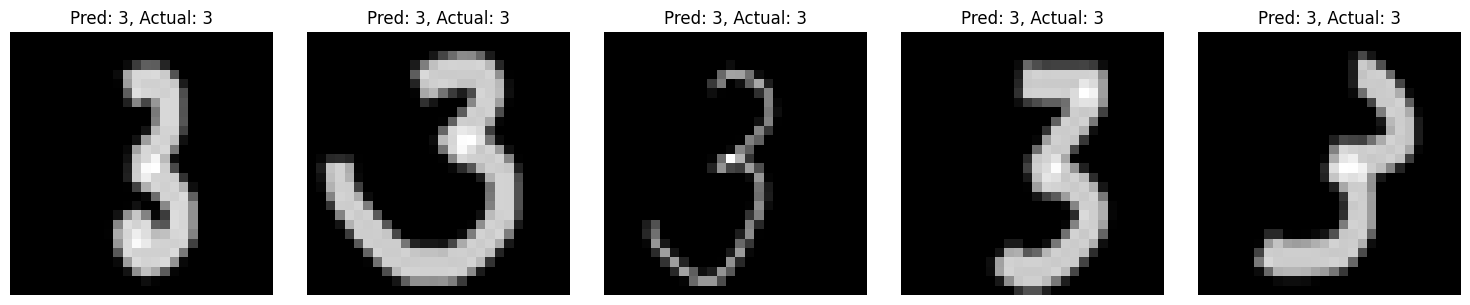

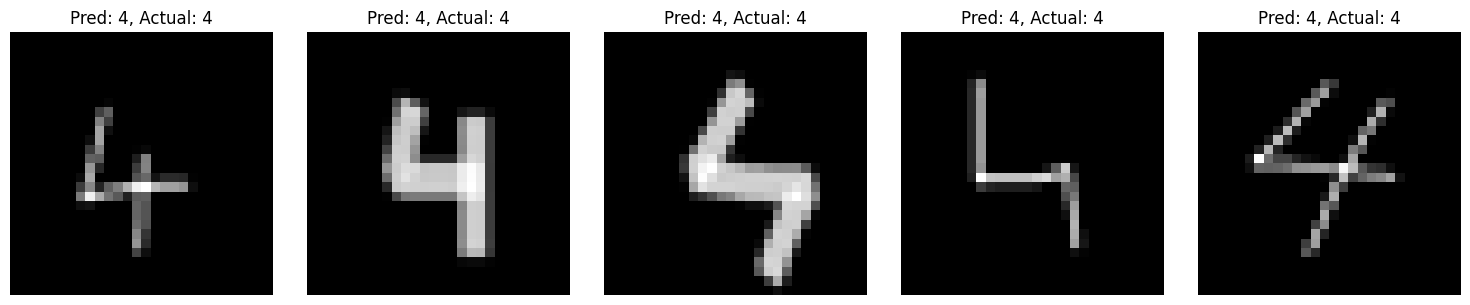

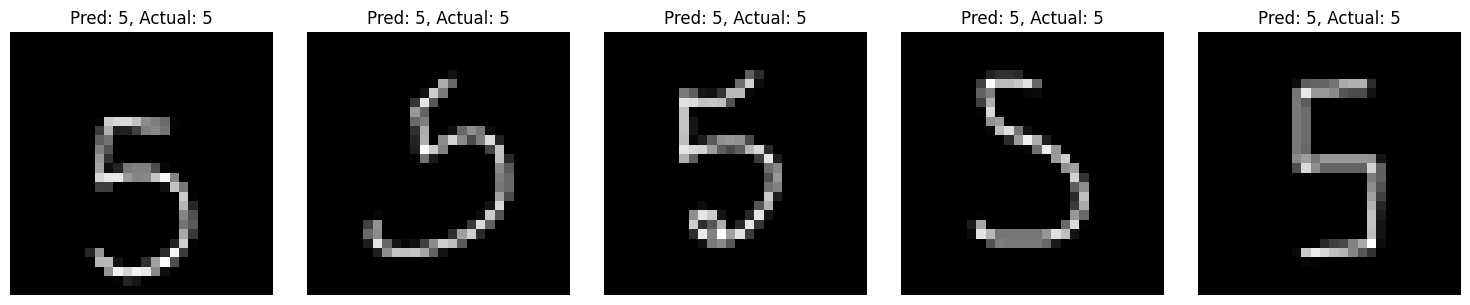

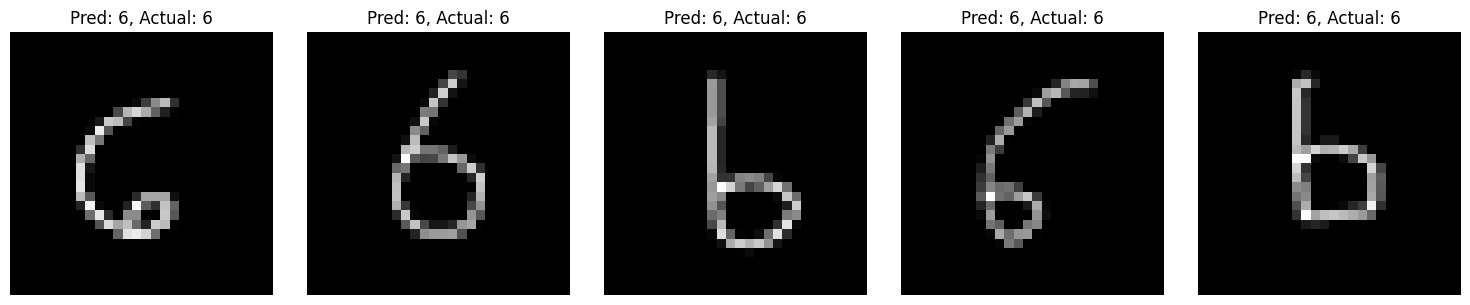

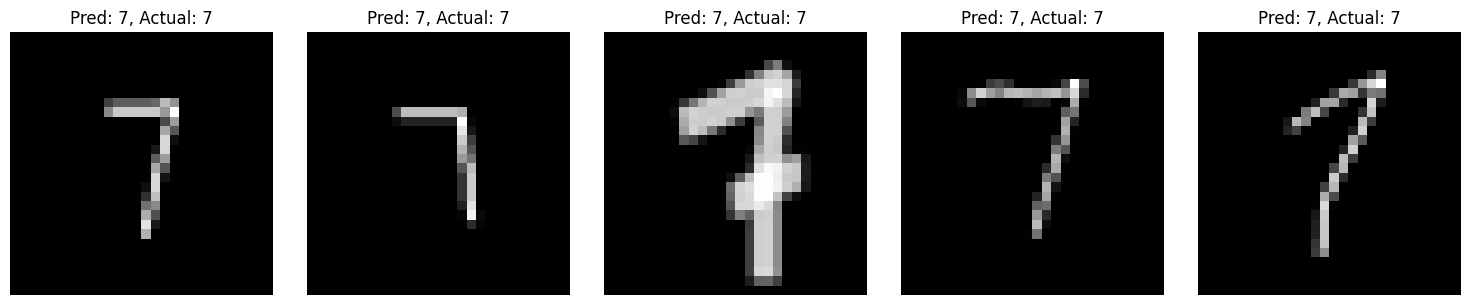

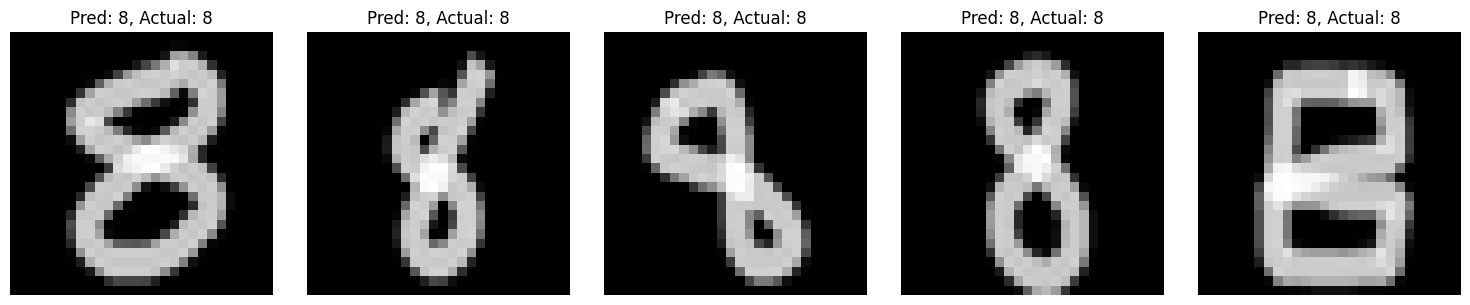

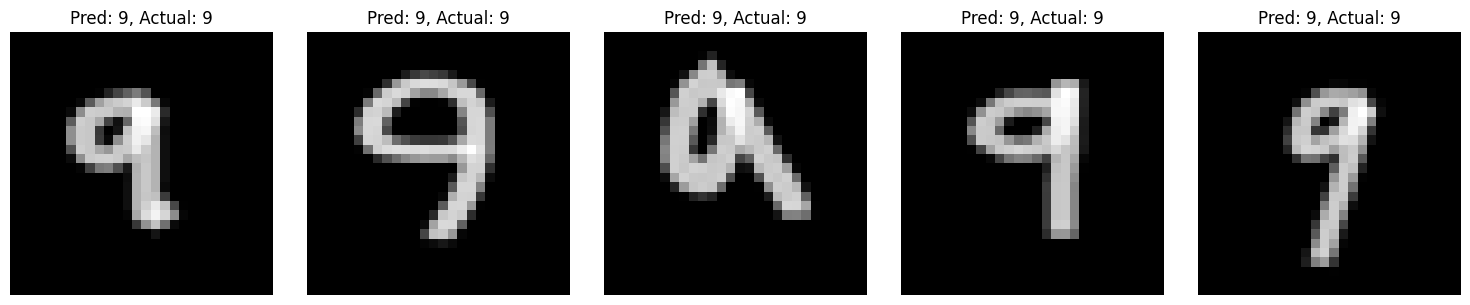


***************** PREDICTED LABELS *******************
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]

***************** ACTUAL LABELS *******************
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


In [15]:
# define batch size
batch_size = 5 

all_actual_labels = []
all_predicted_labels = []

# Collect images and labels
for digit_dir in sorted(os.listdir(custom_images_root_dir)):
    digit_path = os.path.join(custom_images_root_dir, digit_dir)

    # Extract the label from directory name
    if os.path.isdir(digit_path) and digit_dir:
        actual_label = int(digit_dir.split()[-1])
        image_files = [f for f in os.listdir(digit_path) if f.endswith('.png') or f.endswith('.jpg')]
     
        #set up to plot
        fig, axs = plt.subplots(nrows=1, ncols=batch_size, figsize=(15, 3))

        row_images = []
        row_actual_labels = []
        
        for j, image_file in enumerate(image_files):
            if j >= batch_size: 
                break

            image_path = os.path.join(digit_path, image_file)
            img = load_image(image_path)
            row_images.append(img)
            row_actual_labels.append(actual_label)
        row_images = np.array(row_images)
        y_hat_batch = mnist_model.predict(row_images)
        predicted_labels = np.argmax(y_hat_batch, axis=1)

        all_predicted_labels.extend(predicted_labels)
        all_actual_labels.extend(row_actual_labels)

        # Display images
        for j in range(len(row_images)):
            axs[j].imshow(row_images[j].reshape(28, 28), cmap="gray")
            axs[j].set_title(f"Pred: {predicted_labels[j]}, Actual: {row_actual_labels[j]}")
            axs[j].axis("off")

        plt.tight_layout()
        plt.show()

#print predcted label and corresponding actual labels in different arrays
print("\n***************** PREDICTED LABELS *******************")
print(np.array(all_predicted_labels))
print("\n***************** ACTUAL LABELS *******************")
print(np.array(all_actual_labels))


### Testing by  Running Python script inside a Jupyter Notebook

Trying by passing wrong label as argument(below code)

**NOTE** : This is to show failed case

Since all the images predicts correctly this is done to produce error message

In [16]:
!python module5-3.py "Custom MNIST Samples\Digit 0\0_4.png" 9

Instruction to run : Pass Two input arguments image path and digit of the image.        eg: $ python module5.py 3_2.png 3
File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists. Loading...
Figure(640x480)


Fail: Image Custom MNIST Samples\Digit 0\0_4.png is for digit 9 but the inference result is 0



Trying with correct prediction(below)

In [17]:
!python module5-3.py "Custom MNIST Samples\Digit 0\0_4.png" 0

Instruction to run : Pass Two input arguments image path and digit of the image.        eg: $ python module5.py 3_2.png 3
File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists. Loading...
Figure(640x480)


Success: The image is correctly classified.

